In [3]:
from nltk.sentiment import vader
import nltk
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from pywaffle import Waffle
from wordcloud import WordCloud
%matplotlib inline

In [7]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS Intern\task 4\twitter_training.csv")

In [9]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [13]:
df.rename(columns={'2401': 'User', 'Borderlands': 'Game', 'Positive': 'Sentiment','im getting on borderlands and i will murder you all ,': 'Comment'}, inplace=True)
 

In [15]:
df.head()

,User,Game,Sentiment,Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User       74681 non-null  int64 
 1   Game       74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Comment    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [25]:
df.isnull().sum()/len(df)*100

User         0.000000
Game         0.000000
Sentiment    0.000000
Comment      0.918574
dtype: float64

In [29]:
#drop any rows with missing values
df = df.replace('unknown', pd.NA)

df = df.dropna()   

In [31]:
df.isnull().sum()/len(df)*100

User         0.0
Game         0.0
Sentiment    0.0
Comment      0.0
dtype: float64

In [35]:
#create preprocess text function
def preprocess_text(text):
    #tokenize the text
    tokens = word_tokenize(text.lower())
    
    #remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    
     # lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

     # join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

df['Comment'] = df['Comment'].apply(preprocess_text)

In [38]:
df.head()

,User,Game,Sentiment,Comment
0,2401,Borderlands,Positive,"coming border kill ,"
1,2401,Borderlands,Positive,"im getting borderland kill ,"
2,2401,Borderlands,Positive,"im coming borderland murder ,"
3,2401,Borderlands,Positive,"im getting borderland 2 murder ,"
4,2401,Borderlands,Positive,"im getting borderland murder ,"


In [42]:
# initialize NLTK sentiment intensity analyzer

analyzer =  vader.SentimentIntensityAnalyzer()

df['Sentiment_score']= df['Comment'].apply(lambda Review: analyzer.polarity_scores(Review)['compound'] )

In [51]:
df.drop(columns = 'Sentiment')

,User,Game,Comment,Sentiment_score
0,2401,Borderlands,"coming border kill ,",-0.6908
1,2401,Borderlands,"im getting borderland kill ,",-0.6908
2,2401,Borderlands,"im coming borderland murder ,",-0.6908
3,2401,Borderlands,"im getting borderland 2 murder ,",-0.6908
4,2401,Borderlands,"im getting borderland murder ,",-0.6908
...,...,...,...,...
74676,9200,Nvidia,realized window partition mac like 6 year behi...,0.3612
74677,9200,Nvidia,realized mac window partition 6 year behind nv...,0.0000
74678,9200,Nvidia,realized window partition mac 6 year behind nv...,0.0000
74679,9200,Nvidia,realized window partition mac like 6 year behi...,0.3612


In [53]:
# if sentiment > 0 then it's positive but if sentiment < 0 then it's negative otherwise it's neutral
df['Sentiment_type'] = df['Sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

In [57]:
df.tail()

,User,Game,Sentiment,Comment,Sentiment_score,Sentiment_type
74676,9200,Nvidia,Positive,realized window partition mac like 6 year behi...,0.3612,positive
74677,9200,Nvidia,Positive,realized mac window partition 6 year behind nv...,0.0000,neutral
74678,9200,Nvidia,Positive,realized window partition mac 6 year behind nv...,0.0000,neutral
74679,9200,Nvidia,Positive,realized window partition mac like 6 year behi...,0.3612,positive
74680,9200,Nvidia,Positive,like window partition mac like 6 year behind d...,0.6124,positive


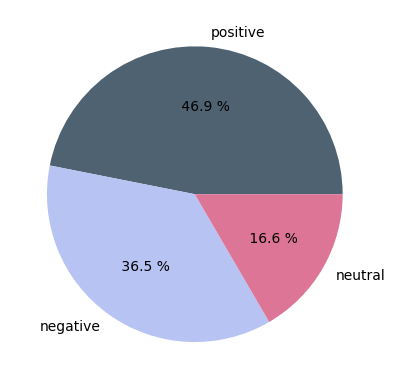

In [64]:
#calculate percentage of each sentiment type
percentages = df['Sentiment_type'].value_counts(normalize=True) * 100

fig, ax = plt.subplots()
ax.pie(
    percentages,
    labels = percentages.index,
    autopct ='% 1.1f %%',
    colors = ['#4F6272', '#B7C3F3', '#DD7596'],
)
plt.show()

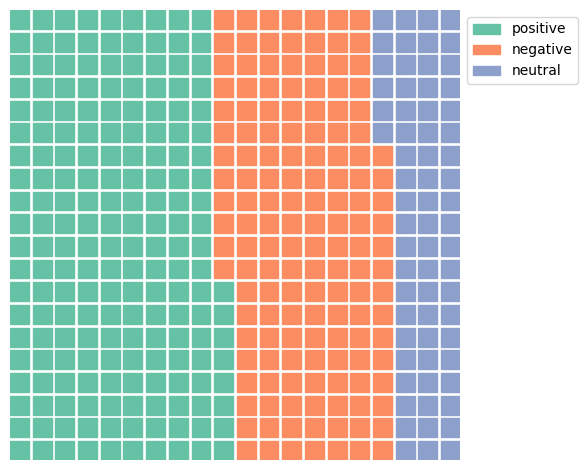

In [67]:
#create data for waffle chart
waffle_df = df['Sentiment_type'].value_counts()

#set up waffle figure
fig = plt.figure(
    values = waffle_df,
    FigureClass = Waffle,
    rows = 20,
    columns=20,
    legend ={'labels':['positive','negative','neutral'],
            'loc':'upper left','bbox_to_anchor':(1,1)}
)
plt.show()

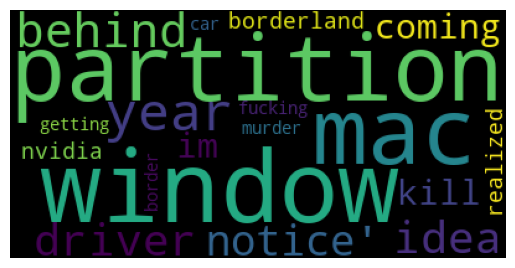

In [70]:
#generate word cloud
word = df['Comment'].values
wordcloud = WordCloud().generate(str(word))

#plot the figure
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word cloud.png")
plt.show()